<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/01_Supervised-%20Machine%20Learning/02_Logistic_Regression/Loan_Approval_Prediction/Loan_approval_prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

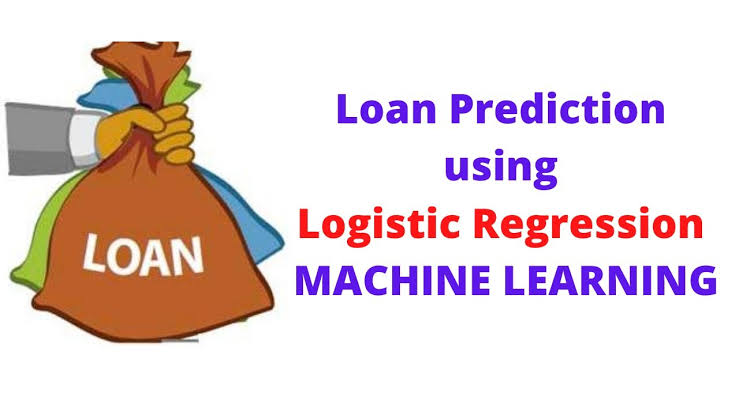
#**Automated Loan Approval Prediction System Using LogisticsRegression**
**📘Project Overview**

This project focuses on building a robust Binary Classification Model to automate and optimize the loan application process.
The core objective is to accurately predict the likelihood of a loan application being Approved or Rejected based on an applicant's historical financial and features (e.g. Age, Gender, Education, Income, Employment_experience, Home_ownership, Loan_amount, Loan_intent, Loan_interest_rate, Loan_percent_income, Credit_history_length, Credit_score, Previous_loan_defaults_on_file, Loan_status).

**Data Loading & Cleaning**

In [155]:

from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/loan_data.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [156]:
# Confirming to see if my data has null or duplicate values

print(f"Null_Values: {df.isna().sum()}")
print("\n")
print(f"Duplicated_Values: {df.duplicated().sum()}")

Null_Values: person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


Duplicated_Values: 0


**Feature Engineering:** Remaining some columns for simplicity and clarity.

In [157]:
df = df.rename(columns={"person_home_ownership":"Home_ownership", "person_gender":"Gender", "person_education":"Education", "person_age":"Age","person_emp_exp":"Employment_experience", "cb_person_cred_hist_length":"Credit_history_length", "person_income":"Income", "loan_amnt":"Loan_amount", "loan_int_rate":"Loan_interest_rate", "loan_intent":"Loan_intent", "loan_percent_income":"Loan_percent_income", "credit_score":"Credit_score", "Loan_status":"Loan_status", "previous_loan_defaults_on_file":"Previous_loan_defaults_on_file", "loan_status":"Loan_status"})
df

,Age,Gender,Education,Income,Employment_experience,Home_ownership,Loan_amount,Loan_intent,Loan_interest_rate,Loan_percent_income,Credit_history_length,Credit_score,Previous_loan_defaults_on_file,Loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [158]:
# I noticed using frequency Encoding will be the best for labeling columns with unique numbers of features
df["Education"].value_counts()

,count
Education,
Bachelor,13399
Associate,12028
High School,11972
Master,6980
Doctorate,621


In [159]:
# creating a frequency encode to represent multiple text features columns (converting from text to numeric)
Education_freq = df["Education"].value_counts().to_dict()
Home_ownership_freq = df['Home_ownership'].value_counts().to_dict()
Loan_intent_freq = df["Loan_intent"].value_counts().to_dict()

df["Education_freq-encode"] = df['Education'].map(Education_freq)
df["Home_ownership_freq-encode"] = df['Home_ownership'].map(Home_ownership_freq)
df["Loan_intent_freq-encode"] = df['Loan_intent'].map(Loan_intent_freq)

# Converting the rest text columns to (0 and 1)
df["Gender"] = df['Gender'].map({"male":1, "female":0})
df["Previous_loan_defaults_on_file"] = df["Previous_loan_defaults_on_file"].map({"Yes":1, "No":0})

#dropping irrelevant columns
df = df.drop(columns=["Education","Home_ownership","Loan_intent"])
df.head()

,Age,Gender,Income,Employment_experience,Loan_amount,Loan_interest_rate,Loan_percent_income,Credit_history_length,Credit_score,Previous_loan_defaults_on_file,Loan_status,Education_freq-encode,Home_ownership_freq-encode,Loan_intent_freq-encode
0,22.0,0,71948.0,0,35000.0,16.02,0.49,3.0,561,0,1,6980,23443,7552
1,21.0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,0,11972,2951,9153
2,25.0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,1,11972,18489,8548
3,23.0,0,79753.0,0,35000.0,15.23,0.44,2.0,675,0,1,13399,23443,8548
4,24.0,1,66135.0,1,35000.0,14.27,0.53,4.0,586,0,1,6980,23443,8548


In [160]:
#Noticed there is an imbalance in the target variable
df.Loan_status.value_counts()

,count
Loan_status,
0,35000
1,10000


**Virtualizing Data's using matplotlib**

/tmp/ipython-input-2470753084.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_status', data=df, palette='viridis')


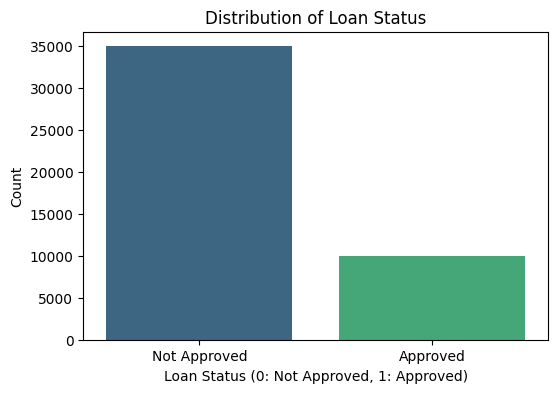

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_status', data=df, palette='viridis')
plt.xlabel('Loan Status (0: Not Approved, 1: Approved)')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.xticks([0, 1], ['Not Approved', 'Approved'])
plt.show()

/tmp/ipython-input-1395282723.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_status_counts = df.groupby(['Age_Group', 'Loan_status']).size().unstack(fill_value=0)


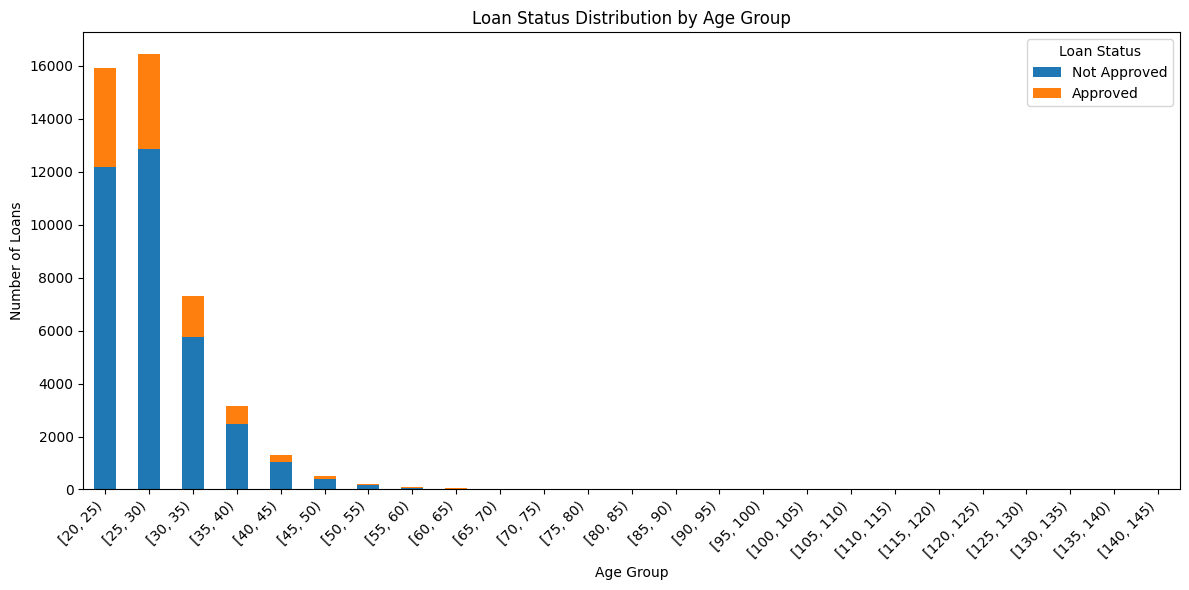

In [162]:
# Create age groups
age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, right=False)

# Group by Age_Group and Loan_status, then unstack to get counts for plotting
age_status_counts = df.groupby(['Age_Group', 'Loan_status']).size().unstack(fill_value=0)

# Plotting a stacked bar chart
age_status_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Age Group')
plt.ylabel('Number of Loans')
plt.title('Loan Status Distribution by Age Group')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status', labels=['Not Approved', 'Approved'])
plt.tight_layout()
plt.show()

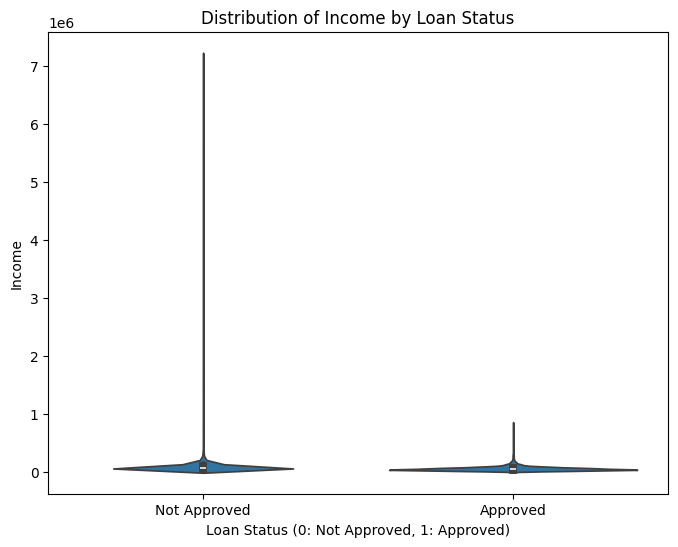

In [163]:
df = df.drop(columns=["Age_Group"])


plt.figure(figsize=(8, 6))
sns.violinplot(x='Loan_status', y='Income', data=df)
plt.xlabel('Loan Status (0: Not Approved, 1: Approved)')
plt.ylabel('Income')
plt.title('Distribution of Income by Loan Status')
plt.xticks([0, 1], ['Not Approved', 'Approved'])
plt.show()

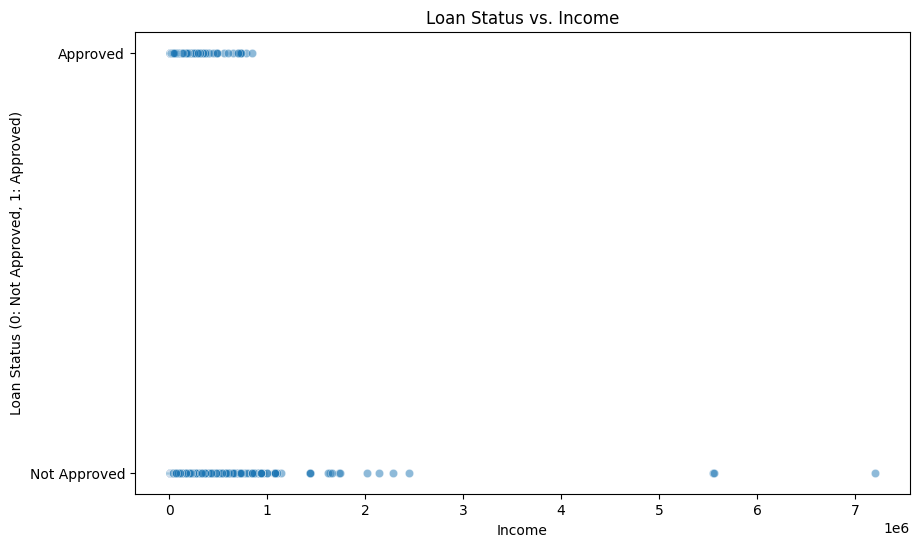

In [164]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Loan_status', data=df, alpha=0.5)
plt.xlabel('Income')
plt.ylabel('Loan Status (0: Not Approved, 1: Approved)')
plt.title('Loan Status vs. Income')
plt.yticks([0, 1], ['Not Approved', 'Approved'])
plt.show()

**Balancing dataset target variable**

In [165]:
status0 = df[df["Loan_status"]==0]
status1 = df[df["Loan_status"]==1]

under_sample = status0.sample(n=10000, random_state=42) # Added random_state for reproducibility

df1 = pd.concat([status1, under_sample], axis=0)
df1.Loan_status.value_counts()

,count
Loan_status,
1,10000
0,10000


In [166]:
df.dtypes

,0
Age,float64
Gender,int64
Income,float64
Employment_experience,int64
Loan_amount,float64
Loan_interest_rate,float64
Loan_percent_income,float64
Credit_history_length,float64
Credit_score,int64
Previous_loan_defaults_on_file,int64


**Verifying to know columns that has strong correlation to Loan Status**

In [167]:
abs(df1.corr(numeric_only=True)["Loan_status"]).sort_values(ascending=False)

,Loan_status
Loan_status,1.000000
Previous_loan_defaults_on_file,0.695154
Loan_percent_income,0.408312
Loan_interest_rate,0.378065
Home_ownership_freq-encode,0.239918
Income,0.185783
Loan_amount,0.127048
Loan_intent_freq-encode,0.062109
Age,0.027542
Employment_experience,0.026777


**Separating feature variables to target variable**

In [168]:
x = df1.drop(columns=["Loan_status"])
y = df1["Loan_status"]

**Model Preparation:** The dataset is split into training and testing sets to evaluate performance.

In [169]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=62)

#Features are normalized using MinMaxScaler to improve model learning.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))
print(f"x_train_shape {x_train.shape}")
print(f"x_test_shape {x_test.shape}")

x_train_shape (16000, 13)
x_test_shape (4000, 13)


**Model Building:**
LogisticRegression – for simple Classification

In [170]:
#LogisticRegression Model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(x_train, y_train)

**LogisticRegression Model Score**

In [171]:
print("Train Score:", log_reg.score(x_train, y_train))
print("Test Score:", log_reg.score(x_test, y_test))

Train Score: 0.872125
Test Score: 0.88325


**Classification report:** Accuracy / F1-Score | 88% | High confidence in classifying an application as approved or rejected.

In [172]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = log_reg.predict(x_test)
CR = classification_report(y_test, y_pred)
print(CR)

              precision    recall  f1-score   support

           0       0.92      0.83      0.88      1980
           1       0.85      0.93      0.89      2020

    accuracy                           0.88      4000
   macro avg       0.89      0.88      0.88      4000
weighted avg       0.89      0.88      0.88      4000



**Visualising Confusion Matrix**

Text(0.5, 1.0, 'Confusion Matrix')

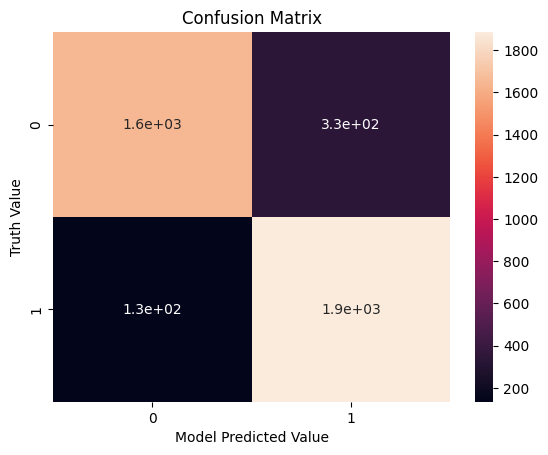

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, annot=True)
plt.xlabel("Model Predicted Value")
plt.ylabel("Truth Value")
plt.title("Confusion Matrix")

In [174]:
y_pred[:10]

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0])

**Conclusion:**
The model achieved a robust 88% performance score (as the F1-Score or Accuracy), confirming its high reliability in making credit risk assessments. This level of performance provides a strong foundation for data-driven decision-making in the loan department.

#**🧰 Tools & Libraries Used:**
Python

Pandas, NumPy for data handling

Scikit-learn for preprocessing and model training

Google Colab for running and testing the notebook